# Spectral Clustering

[sklearn.cluster.SpectralClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

Spectral Clustering does a low-dimension embedding of the affinity matrix between samples, followed by a KMeans in the low dimensional space. It is especially efficient if the affinity matrix is sparse and the pyamg module is installed. SpectralClustering requires the number of clusters to be specified. It works well for a small number of clusters but is not advised when using many clusters.

For two clusters, it solves a convex relaxation of the normalised cuts problem on the similarity graph: cutting the graph in two so that the weight of the edges cut is small compared to the weights of the edges inside each cluster. This criteria is especially interesting when working on images: graph vertices are pixels, and edges of the similarity graph are a function of the gradient of the image.

Usable examples: [Segmenting the picture of a raccoon face in regions](http://scikit-learn.org/stable/auto_examples/cluster/plot_face_segmentation.html)

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
from skimage import io
import matplotlib.pylab as plt
sys.path += [os.path.abspath('.'), os.path.abspath('..')]  # Add path to root
import notebooks.notebook_utils as uts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/datagrid/personal/borovec/Applications/vEnv2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## load datset

loading dataset: (True) exists -> /datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v0/datasetFuzzy_raw
loading (True) <- /datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v0/dictionary/atlas.png


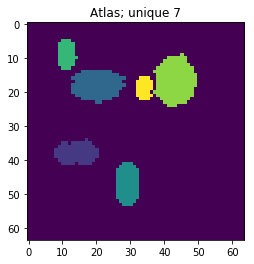

In [7]:
p_dataset = os.path.join(uts.DEFAULT_PATH, uts.SYNTH_DATASETS_FUZZY[0])
print ('loading dataset: ({}) exists -> {}'.format(os.path.exists(p_dataset), p_dataset))

p_atlas = os.path.join(uts.DEFAULT_PATH, 'dictionary/atlas.png')
atlas_gt = io.imread(p_atlas)
nb_patterns = len(np.unique(atlas_gt))
print ('loading ({}) <- {}'.format(os.path.exists(p_atlas), p_atlas))
plt.imshow(atlas_gt, interpolation='nearest')
_ = plt.title('Atlas; unique %i' % nb_patterns)

In [8]:
list_imgs = uts.load_dataset(p_dataset)
print ('loaded # images: ', len(list_imgs))
img_shape = list_imgs[0].shape
print ('image shape:', img_shape)

('loaded # images: ', 800)
('image shape:', (64, 64))


## Pre-Processing

('input data shape:', (800, 4096))


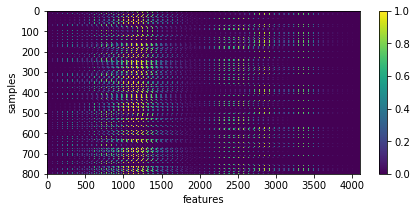

In [9]:
X = np.array([im.ravel() for im in list_imgs])  # - 0.5
print ('input data shape:', X.shape)

plt.figure(figsize=(7, 3))
_= plt.imshow(X, aspect='auto'), plt.xlabel('features'), plt.ylabel('samples'), plt.colorbar()

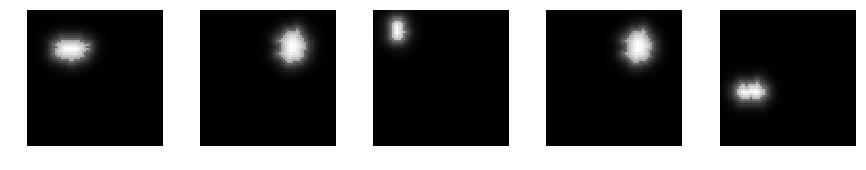

In [10]:
uts.show_sample_data_as_imgs(X, img_shape, nb_rows=1, nb_cols=5)

## SparsePCA

In [18]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=nb_patterns, n_jobs=-1) # , assign_labels='discretize'

sc.fit(X[:1200, :].T)
atlas = sc.labels_.reshape(atlas_gt.shape)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=7, n_init=10, n_jobs=-1, n_neighbors=10,
          random_state=None)

('labels:', (4096,))


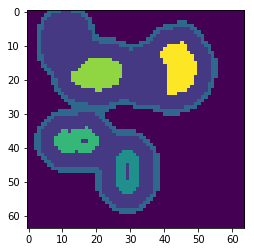

In [19]:
plt.imshow(atlas)